# Dealing with Images in Python using PIL
###### Author: Ramon Durães 

Images are our main form of capturing and storing visual data. While our brains make sense of the differences in light intensity and color captured by our eyes, all the computer sees is numbers. And that we know how to deal with!


## Introduction 

As data scientists, we need to be able to work with data that's stored in a variety of ways. The objective of this tutorial is to introduce images as a form of data storage, demistify it's structure and demonstrate how you can use images for simple tasks. 

### Libraries

Let's start our code by importing the necessary libraries. Please install them beforehand using pip, conda or the desired python package managed.

In [18]:
# To read the images
import PIL.Image as Image
# Python numeric data library
import numpy as np
# To create dataframes
import pandas as pd
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn')
%matplotlib inline
# To display the 3D scatter plot of coloured pixels
from plotly.graph_objs import layout, Layout, Figure

## Grayscale Images

We'll now load our first image file named 'grayscale.jpeg', available at https://github.com/ramongduraes/dice-images. We'll use python's PIL library to open it (PIL.Image.open()) and convert into grayscale using use Image.convert('L'), since it's simpler to work with. We'll later work with RGB images.

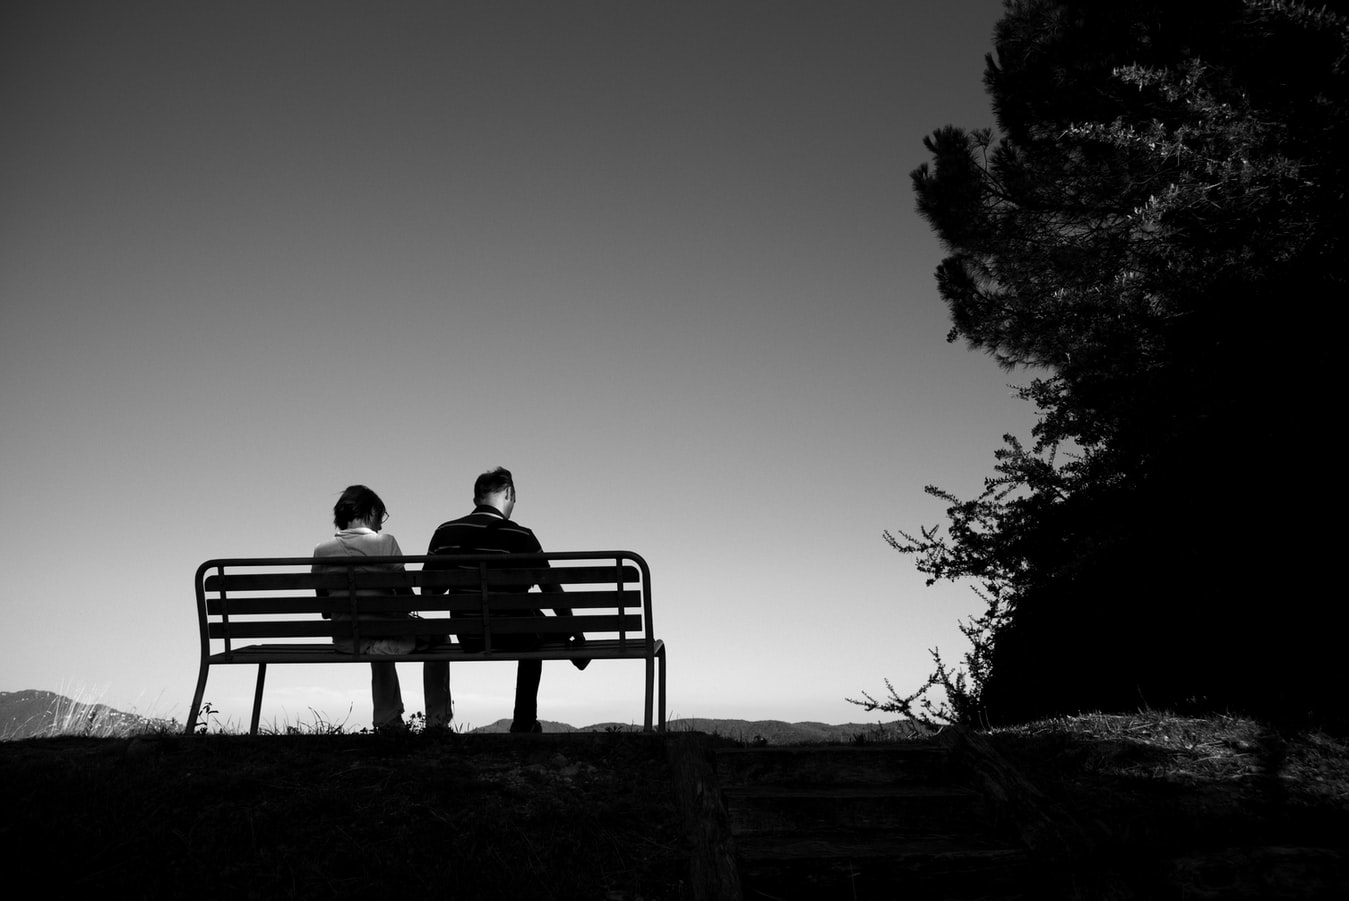

In [19]:
img = Image.open('grayscale.jpeg').convert('L') 
img # If you're not using jupyter notebook, use img.show()

### Images as arrays

Reading an image using PIL.Image.open() stores it in an image data structure (PIL.Image.Image). You can check that by running type(img).

To work with the image, we typically want it to be in the form of an array. We can accomplish that by using numpy's array function, which will convert the image to its 'numpy.ndarray' (Numpy library's N-Dimensional Array) class.

In [20]:
img_array = np.array(img)
print(type(img_array))
print(img_array.shape)

<class 'numpy.ndarray'>
(901, 1349)


Since this is a grayscale image, notice that we ended up with a two-dimensional array. Every position in this array corresponds a numerical pixel intensity value ranging from 0 (black) to 255 (white). 

To get a grasp of how the pixel intensities are distributed in the example image, we'll flatten the 2D image array into a 1D array of values and display them in a histogram containing exactly 256 bins. 

Flat array shape: (1215449,)


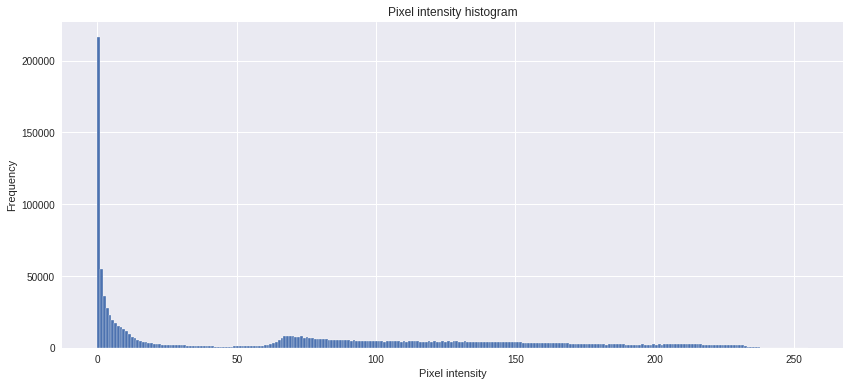

In [21]:
img_flat = img_array.flatten()
print("Flat array shape: " + str(img_flat.shape))
fig, ax = plt.subplots(figsize=(14,6))
plt.hist(img_flat, edgecolor = 'white', bins=256)
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.title('Pixel intensity histogram');

Looking and the histogram, there are a lot of dark pixels (intensities from 0 to roughly 50) and then a cluster of lighter pixels (from 50 to 255). Let's try a vey naive form of image segmentation by using 50 as a threshold below which every pixel will be set to 0 and 1 otherwise. The result will be stored in the variable segmented_flat_img.

Since we've flattened the image, to visualize it we need to recover the spacial distribution of the pixels by rearranging the array into it's original shape (img_array.shape). To do that, we'll use python's reshape method. We'll then go back to PIL and turn the resulting array into an image by using PIL.Image.fromarray, using mode='L'  to inform PIL that we're dealing with a grayscale image.  

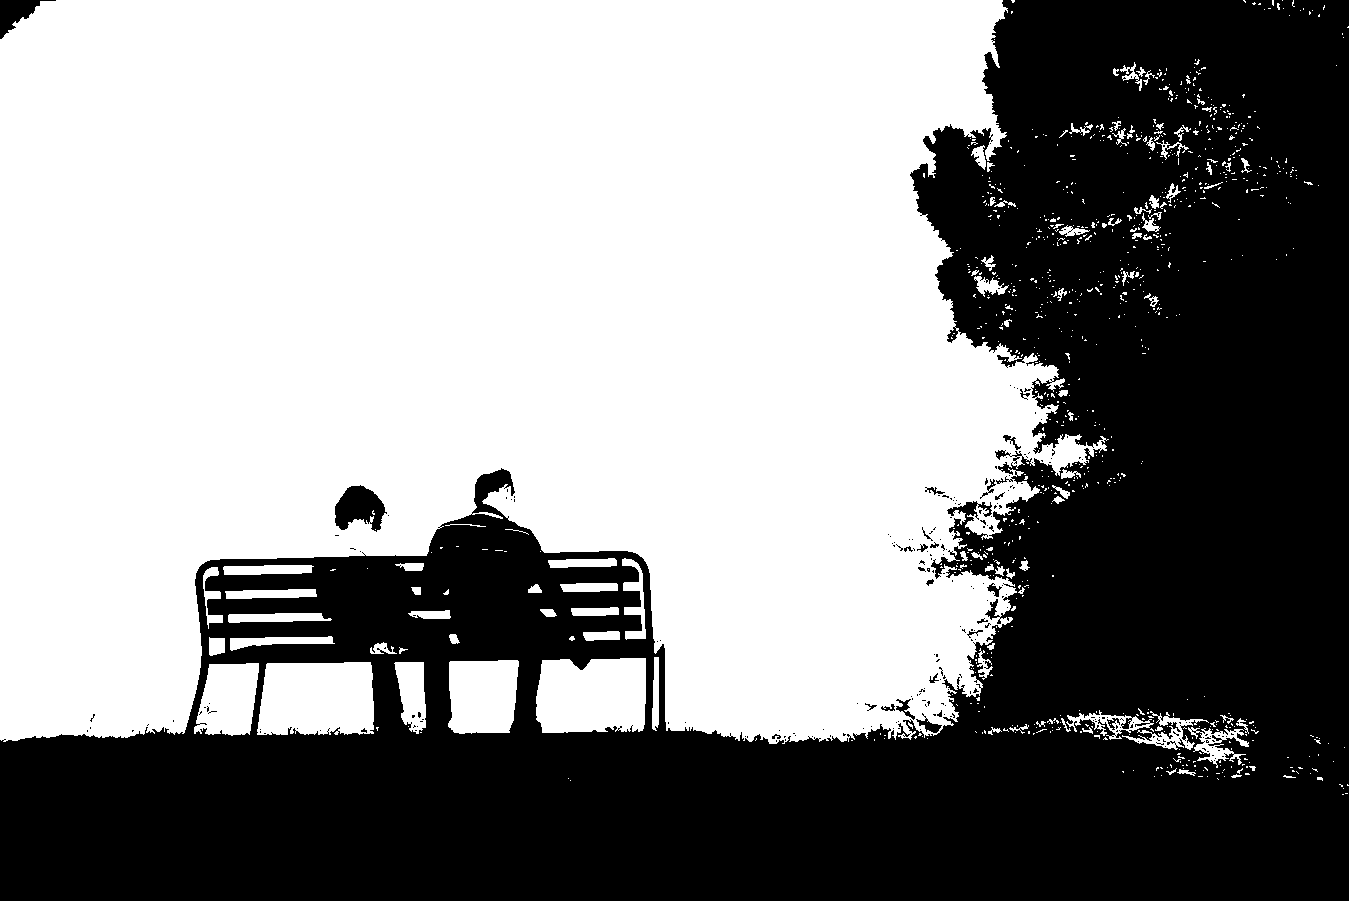

In [22]:
# Applying the threshold
threshold = 50
segmented_flat_img = 255 * (img_flat > threshold)
# Reconstructing and displaying the image
reconstructed_array = segmented_flat_img.reshape(img_array.shape) 
reconstructed_image = Image.fromarray(np.uint8(reconstructed_array), mode='L') 
reconstructed_image

## RGB Images

We're now going to read an RGB image using Image.open, same as above. 

Original image size: 873x763
New image size: 457x400


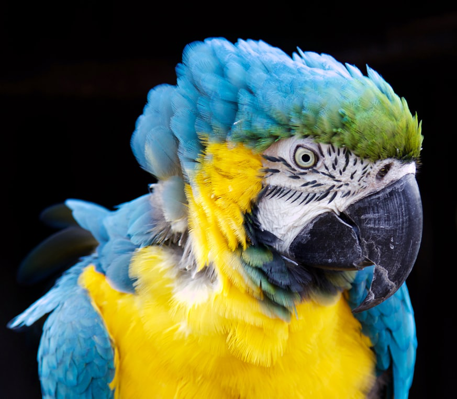

In [23]:
img = Image.open('macaw.png') # pil.open() to read an image
img # If you're not using jupyter notebook, use img.show()

## Converting to ndarray

As before, we'll convert the RGB image into an n-dimensional array ('numpy.ndarray') to see how it differs from grayscale images.

In [24]:
img_array = np.array(img)
img_array.shape

(399, 457, 3)

Now our image is in the form of a numpy n-dimensional array with dimensions (399, 457, 3).

The third dimension of the array is what differs in the case of coloured images. Each of the 3 dimensions corresponds to a channel of the image in the RGB space:

- Red :   [:, :, 0]
- Green : [:, :, 1]
- Blue :  [:, :, 2]

## Image as points in the RGB space

In order to work with the colours of our image, we want to represent it in the RGB space, which means that we need to stack the individual pixel values once again. In other words, we want to keep the third dimension (that represents the red, green and blue values of the pixels) and stack the first two. Hence we end up with a matrix of dimensions $width * height$ by $depth$.

In [25]:
img_stack = img_array.reshape(-1,3) # stacks pixels
img_stack.shape

(182343, 3)

Now our image is in the form of a numpy array with dimensions (182343, 3). You can sanity check by multiplying the height and width of the image to see if it matches the first dimension of our matrix of stacked pixels.

This is a simple plot of the pixel values in the RGB colour space. Do not worry about what this chunk of code does specifically. All we want is to see how a sample of the pixel values of the image is distributed in the RGB colour space. Notice that instead of plotting the 3-dimensional data, the following image shows the data in every combination of 2 dimensions: (Red by Green), (Red by Blue) and (Green by Blue), as well as a histogram of the 1-dimensional values.

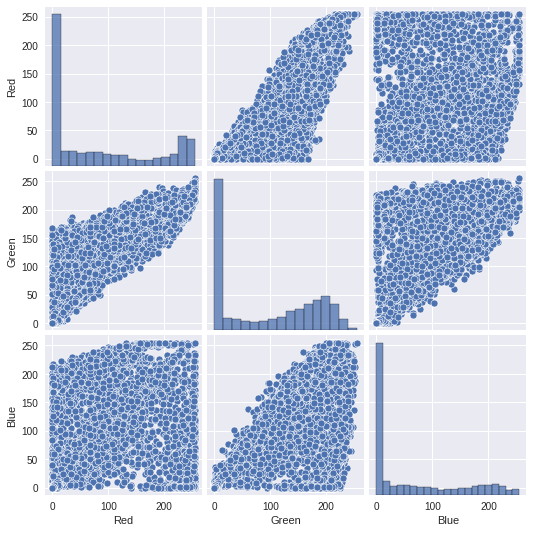

In [26]:
# Sampling some values
Idx = np.arange(img_stack.shape[0]) # A sequence from 0 to the number of pixels
sampleIdx = np.random.choice(Idx, size = 10000) # Sampling some values to be visualised
img_stack_sample = img_stack[sampleIdx] # Selecting the sampled pixels
img_df_sample = pd.DataFrame(img_stack_sample, columns=['Red', 'Green', 'Blue']) # Converting the sample to a pandas dataframe

# Visualizing
sns.pairplot(img_df_sample)

Another nice way to visualize the same data is by actually plotting it in 3 dimensions, corresponding to the RGB space, and have the colour of each point in the plot match the colour of the associated pixel in the image. In other words, what we get is the colors of macaw distributed in the RGB space!

In [30]:
xs = img_stack_sample[:,0]
ys = img_stack_sample[:,1]
zs = img_stack_sample[:,2]
colors = ["rgb({},{},{})".format(x,y,z) for x,y,z in zip(xs.astype(str).tolist(), ys.astype(str).tolist(), zs.astype(str).tolist())]

trace=dict(type='scatter3d',
           x=xs,
           y=ys,
           z=zs,
           mode='markers',
           marker=dict(color=colors,
                       size=3),
           
          )

l = Layout(
    scene=layout.Scene(
        xaxis=layout.scene.XAxis(title='R'),
        yaxis=layout.scene.YAxis(title='G'),
        zaxis=layout.scene.ZAxis(title='B')
    )
)

Figure(trace, layout=l)

## Conclusion

I hope this introduction demistifies images and their structure, enabling you to read images and mold them into the form that suits the application the most.

If you're dealing with grayscale medical images, accessing its histogram enables you to perform sevel histogram transformations that could highlight different organs in the image. However if the task at hand is colour segmentation, stacking the pixels will allow you to run clustering algorithms to accomplish the task. Or if you want to keep the image in its original spacial structure, you can perform operations based on convolution to go from simple edge detection to automatic classification using deep neural networks. The sky is the limit!